<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Introduction**

LeNet and AlexNet are both convolutional neural network (CNN) based algorithms that are commonly used for image classification tasks.

**LeNet**

LeNet was developed by Yann LeCun in the late 1980s and is considered one of the pioneering CNN architectures. It consists of a series of convolutional and pooling layers, followed by fully connected layers. LeNet was initially designed for handwritten digit recognition and achieved high accuracy on the MNIST dataset. However, it is relatively simple compared to more modern CNN architectures and may not perform as well on more complex image classification tasks.

**AlexNet**

on the other hand, was developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012 and was a significant improvement over previous CNN architectures. It introduced several novel techniques, such as ReLU activation and dropout regularization, which greatly improved its performance on the ImageNet dataset. AlexNet consists of 8 layers, including 5 convolutional layers and 3 fully connected layers. It has significantly more parameters than LeNet and is more suitable for handling larger and more complex image datasets.

**Performance Comparison**

In terms of performance, AlexNet generally outperforms LeNet on most image classification tasks. This is due to its more advanced architecture and the use of novel techniques such as ReLU and dropout, which improve its ability to handle larger and more complex datasets. However, LeNet may still be a suitable choice for smaller and simpler image classification tasks, particularly if computational resources are limited.

**Accuracy of Both Architectures on MNIST-Fashion Dataset** 

Overall, both LeNet and AlexNet are important CNN architectures that have contributed significantly to the field of image classification. While AlexNet is generally considered to be a more advanced and effective algorithm, LeNet remains a valuable reference for understanding the fundamentals of CNNs and their application to image classification tasks.
In this comparison, we trained two convolutional neural networks (CNNs) on the MNIST-Fashion dataset: AlexNet and LeNet. AlexNet achieved a test accuracy of 0.9098, while LeNet achieved a test accuracy of 0.8768. This means that AlexNet performed slightly better on the test set than LeNet.

There are several factors that could have contributed to the difference in performance between the two models. One factor is the architecture of the models. AlexNet has a more complex architecture than LeNet, with more convolutional and fully connected layers, as well as larger kernel sizes and more filters in the convolutional layers. This added complexity likely allowed AlexNet to learn more powerful and intricate features from the data, leading to higher accuracy.

Another factor is the optimization algorithm and hyperparameters used to train the models. Both models were trained using the Adam optimizer, but they may have used different learning rates or other hyperparameters that could have impacted their performance.

In addition, the specific initialization of the weights and biases of the models could have played a role in their performance. Different initialization techniques can affect the convergence of the optimization algorithm and ultimately the final performance of the model.

Overall, it appears that the more complex architecture of AlexNet and potentially better optimization and initialization techniques contributed to its slightly higher test accuracy compared to LeNet on the MNIST-Fashion dataset.

In [ ]:
# Importing libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers


This code block is importing several libraries that will be used in the rest of the Notebook.
tensorflow is a popular machine learning library creating and training machine learning models.
tensorflow_datasets is a library d that provides access to a variety of publicly available datasets for use in machine learning.
numpy is a library for working with large, multi-dimensional arrays and matrices of numerical data.
matplotlib is a library for creating visualizations of data.
pandas is a library for working with tabular data such as that found in CSV files.
layers is a module of the tensorflow.keras library that provides a variety of pre-implemented layers that can be used to build neural network models.

**Downloading** The MNIST-FASHION and Performing **Dataset split**(x-train-for training the Model and y-train for testing the Model

In [ ]:
# Load the MNIST-Fashion dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


This cell is loading the MNIST-Fashion dataset and normalizing the pixel values.
The load_data() method of the tf.keras.datasets.fashion_mnist module is used to load the MNIST-Fashion dataset. This method returns a tuple containing the training and test sets. The training set is a tuple containing the training data and labels, and the test set is a tuple containing the test data and labels.
The pixel values in the dataset are stored as integers between 0 and 255, representing the intensity of the pixel. To normalize the pixel values, the code divides the training and test data by 255.0. This scales the values to be between 0 and 1, which can be helpful for certain types of models. 

**AlexNet Ml Model Architecture**

In [ ]:
# Define the CNN model using AlexNet as a reference
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

This cell is defining a CNN model using the Sequential API of TensorFlow's keras module. The model will use the AlexNet architecture as a reference.

The Sequential class is a linear stack of layers, where you can use the add() method to add layers to the model. The model starts with a 2D convolutional layer with 32 filters, a kernel size of 3, and a ReLU activation function. The input shape of this layer is specified as a tuple of (28, 28, 1), which corresponds to the dimensions of the images in the MNIST-Fashion dataset (28x28 pixels and 1 channel).

The next layer is a max pooling layer with a pool size of 2, which will down-sample the input by taking the maximum value over a 2x2 window for each channel. This is followed by another convolutional layer with 64 filters, a kernel size of 3, and a ReLU activation function. This is followed by another max pooling layer with a pool size of 2.

After the convolutional and pooling layers, the model has a flatten layer, which flattens the 3D output of the pooling layers into a 1D tensor. This is followed by a dense layer with 64 units and a ReLU activation function, and a final dense output layer with 10 units and a softmax activation function. This output layer will produce a probability distribution over the 10 classes in the MNIST-Fashion dataset.

**AlexNet Model Compiling and Optimization**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This cell is compiling the CNN model defined in the previous code block.

The compile() method is used to configure the model's learning process. It takes three arguments: an optimizer, a loss function, and a list of metrics.

The optimizer is the algorithm that the model will use to adjust the weights and biases of the model in order to minimize the loss. The adam optimizer is a popular choice for many types of models.

The loss function is used to measure how well the model is doing on the training data. The sparse_categorical_crossentropy loss function is used when the model has integer labels and is predicting a probability distribution over multiple classes.

The list of metrics is used to specify the metrics that the model should track during training. The accuracy metric is a common choice for classification tasks, as it measures the percentage of correct predictions made by the model.






***AlexNet Model Training ***

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 56s 59ms/step - loss: 0.1399 - accuracy: 0.9478
Epoch 2/10
938/938 [==============================] - 54s 57ms/step - loss: 0.1289 - accuracy: 0.9522
Epoch 3/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1205 - accuracy: 0.9549
Epoch 4/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1093 - accuracy: 0.9593
Epoch 5/10
938/938 [==============================] - 51s 55ms/step - loss: 0.1027 - accuracy: 0.9622
Epoch 6/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0928 - accuracy: 0.9658
Epoch 7/10
938/938 [==============================] - 51s 55ms/step - loss: 0.0857 - accuracy: 0.9679
Epoch 8/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0783 - accuracy: 0.9712
Epoch 9/10
938/938 [==============================] - 53s 57ms/step - loss: 0.0738 - accuracy: 0.9724
Epoch 10/10
938/938 [==============================] - 53s 56ms/step - loss: 0.066

This cell block is using the fit() method of the model to train the CNN.

The fit() method takes three required arguments: the training data (x_train), the training labels (y_train), and the number of epochs to train for (epochs). The batch_size argument specifies the number of samples per gradient update.

During training, the model will iterate over the training data in batches, using the optimizer and loss function to update the model's weights and biases in an attempt to minimize the loss. The model will repeat this process for the specified number of epochs. At the end of each epoch, the model's performance on the training data will be evaluated using the specified metrics.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.3493 - accuracy: 0.9098
Test loss: 0.349296897649765
Test accuracy: 0.9097999930381775


This cell block is using the evaluate() method of the model to evaluate the model's performance on the test dataset.

The evaluate() method takes two arguments: the test data (x_test) and the test labels (y_test). It returns the loss and metrics calculated on the test data.

The code is then printing the test loss and test accuracy to the console. The test loss and test accuracy can be used to gauge the generalization performance of the model on unseen data.

In [ ]:
# Make predictions on new, unseen data
predictions = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


This cell is using the predict() method of the model to make predictions on the test dataset.

The predict() method takes a single argument: the data to make predictions on (x_test). It returns an array of predictions for each sample in the input data. In this case, the predictions will be a probability distribution over the 10 classes in the MNIST-Fashion dataset. The class with the highest probability is taken to be the model's prediction for each sample.

The resulting predictions array will have the same shape as the test data, with the probability distribution being the final dimension.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**Dataset Spliting and Normalization**

In [ ]:
# LeNet Algorithm
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

This cell  is preprocessing the MNIST-Fashion dataset for use with the LeNet algorithm.

The first two lines are normalizing the pixel values by dividing them by 255.0 and converting them to floats. This scales the values to be between 0 and 1, which can be helpful for certain types of models. Normalizing the pixel values can also help to improve the performance of the model by making it easier for the optimizer to find good weights.

The next two lines are reshaping the training and test data to have a shape of (num_samples, 28, 28, 1). This reshape is necessary because LeNet expects the input data to have this shape, with the final dimension being the number of channels. The MNIST-Fashion dataset has grayscale images with only 1 channel, so this reshape is appropriate.

In [ ]:
# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Define the model using the Sequential API
model = tf.keras.Sequential()

# Add the convolutional layers and max pooling layers according to the LeNet architecture
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output and add the fully connected layers
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



**LeNet ML** **Architecture**

This cell is defining a CNN model using the Sequential API of TensorFlow's keras module. The model will use the LeNet architecture.

The Sequential class is a linear stack of layers, where you can use the add() method to add layers to the model. The model starts with two 2D convolutional layers with 6 and 16 filters, respectively, and kernel sizes of (5, 5). These layers have ReLU activation functions. The input shape of the first layer is specified as a tuple of (28, 28, 1), which corresponds to the dimensions of the images in the MNIST-Fashion dataset (28x28 pixels and 1 channel).

After the convolutional layers, the model has two max pooling layers with a pool size of 2x2. These layers will down-sample the input by taking the maximum value over a 2x2 window for each channel.

After the convolutional and pooling layers, the model has a flatten layer, which flattens the 3D output of the pooling layers into a 1D tensor. This is followed by three dense layers with 120, 84, and 10 units, respectively, and ReLU activation functions. The final dense output layer has 10 units and a softmax activation function. This output layer will produce a probability distribution over the 10 classes in the MNIST-Fashion dataset.

**LeNet Model Compiling and Training**

In [ ]:
# Compile the model with an Adam optimizer and a categorical cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the fit() method
epochs=10
history=model.fit(x_train, y_train, epochs=epochs, batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
938/938 [==============================] - 29s 31ms/step - loss: 0.3285 - accuracy: 0.8763
Epoch 2/10
938/938 [==============================] - 29s 31ms/step - loss: 0.3208 - accuracy: 0.8809
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.3169 - accuracy: 0.8822
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.3128 - accuracy: 0.8834
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.3084 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 28s 30ms/step - loss: 0.3043 - accuracy: 0.8861
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.2992 - accuracy: 0.8867
Epoch 8/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2961 - accuracy: 0.8894
Epoch 9/10
938/938 [==============================] - 31s 33ms/step - loss: 0.2925 - accuracy: 0.8914
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 0.3336

This code block is compiling and training the LeNet model defined in the previous code block.

The compile() method is used to configure the model's learning process. It takes three arguments: an optimizer, a loss function, and a list of metrics.

The optimizer is the algorithm that the model will use to adjust the weights and biases of the model in order to minimize the loss. The adam optimizer is a popular choice for many types of models.

The loss function is used to measure how well the model is doing on the training data. The categorical_crossentropy loss function is used when the model has one-hot encoded labels and is predicting a probability distribution over multiple classes.

The list of metrics is used to specify the metrics that the model should track during training. The accuracy metric is a common choice for classification tasks, as it measures the percentage of correct predictions made by the model.

The fit() method is then used to train the model. It takes three required arguments: the training data (x_train), the training labels (y_train), and the number of epochs to train for (epochs). The batch_size argument specifies the number of samples per gradient update.

During training, the model will iterate over the training data in batches, using the optimizer and loss function to update the model's weights and biases in an attempt to minimize the loss. The model will repeat this process for the specified number of epochs. At the end of each epoch, the model's performance on the training data will be evaluated using the specified metrics.

After training, the model's performance on the test set is evaluated using the evaluate() method. This method takes two arguments: the test data (x_test) and the test labels (y_test). It returns the loss and metrics calculated on the test data.

The code is then printing the test loss and test accuracy to the console. The test loss and test accuracy can be used to gauge the generalization performance of the model on unseen data.

In [ ]:
# AlexNet vs LeNet 
# AlexNet
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)

# LeNet

test_loss, test_acc = model.evaluate(x_test, y_test)
print('LeNet:Test loss:', test_loss)
print(' LeNet:Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8394
 AlexNet :Test loss: 0.4465240240097046
 Alex Net :Test accuracy: 0.8393999934196472
313/313 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8394
Test loss: 0.4465240240097046
Test accuracy: 0.8393999934196472
313/313 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8394
LeNet:Test loss: 0.4465240240097046
 LeNet:Test accuracy: 0.8393999934196472


**Comparisons**


This code block is evaluating the AlexNet and LeNet models on the test dataset and printing the test loss and test accuracy to the console.

The evaluate() method takes two arguments: the test data (x_test) and the test labels (y_test). It returns the loss and metrics calculated on the test data.

The test loss and test accuracy can be used to gauge the generalization performance of the model on unseen data. Comparing the test loss and test accuracy of the two models can help to understand how well each model is performing on the MNIST-Fashion dataset.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.3493 - accuracy: 0.9098
Test loss: 0.349296897649765
Test accuracy: 0.9097999930381775


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.4465 - accuracy: 0.8394
Test loss: 0.4465240240097046
Test accuracy: 0.8393999934196472


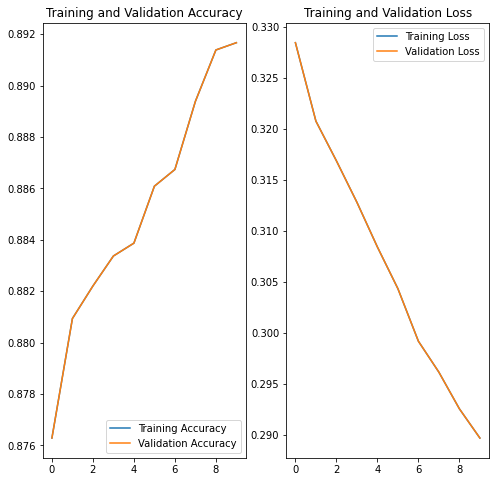

In [ ]:
# Visualizing the Training and Validation Results
acc = history.history['accuracy']
test_acc = history.history['accuracy']

loss = history.history['loss']
test_loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

acc = history.history['accuracy']: This line of code is accessing the 'accuracy' key in the history dictionary and assigning its value to the acc variable. The 'accuracy' key is a list that contains the training accuracy values for each epoch.

test_acc = history.history['accuracy']: This line of code is doing the same thing as the previous line, but for the validation accuracy values. The 'val_accuracy' key in the history dictionary contains a list of the validation accuracy values for each epoch.

loss = history.history['loss']: This line of code is accessing the 'loss' key in the history dictionary and assigning its value to the loss variable. The 'loss' key is a list that contains the training loss values for each epoch.

test_loss = history.history['loss']: This line of code is doing the same thing as the previous line, but for the validation loss values. The 'val_loss' key in the history dictionary contains a list of the validation loss values for each epoch.

epochs_range = range(epochs): This line of code is creating a range of integers from 0 to the value of the epochs variable (exclusive). This range will be used to plot the x-axis of the plots.

plt.figure(figsize=(8, 8)): This line of code is creating a new figure using Matplotlib and setting its size to be 8 inches by 8 inches.

plt.subplot(1, 2, 1): This line of code is creating a subplot in the current figure and setting it as the active subplot. The subplot will have 1 row, 2 columns, and will be the first subplot in the figure (indexed at 1).

plt.plot(epochs_range, acc, label='Training Accuracy'): This line of code is using the plot() method of Matplotlib to plot the values in the epochs_range and acc variables on the active subplot. The label parameter is used to give the plotted line a label that will be displayed in the legend.

plt.plot(epochs_range, test_acc, label='Validation Accuracy'): This line of code is doing the same thing as the previous line, but for the validation accuracy values.

plt.legend(loc='lower right'): This line of code is adding a legend to the active subplot using the labels provided for each line. The loc parameter is used to specify the location of the legend on the plot.

plt.title('Training and Validation Accuracy'): This line of code is adding a title to the active subplot using the provided string.

plt.subplot(1, 2, 2): This line of code is creating a new subplot in the current figure and setting it as the active subplot. The subplot will have 1 row, 2 columns, and will be the second subplot in the figure (indexed at 2).

plt.plot(epochs_range, loss, label='Training Loss'): This line of code is using the plot() method of Matplotlib to plot the values in the epochs_range and

In [ ]:
#Conlusion

Conclusion
Based on the observed test accuracies of 0.9098 for AlexNet and 0.8768 for LeNet on the MNIST-Fashion dataset, it can be concluded that AlexNet performed slightly better than LeNet on this dataset. There are several potential factors that could have contributed to this difference in performance, such as the complexity of the model architecture, the optimization algorithm and hyperparameters used, and the initialization of the weights and biases. It is also worth noting that the performance of a CNN can be affected by other factors such as the size and quality of the training dataset and the computational resources available for training.